## **Loading Required packages and Data**

In [1]:
###1. Load Data and Splot Data
#from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()





## **Data Splitting**

In [2]:
# splitting the data into test and train set
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


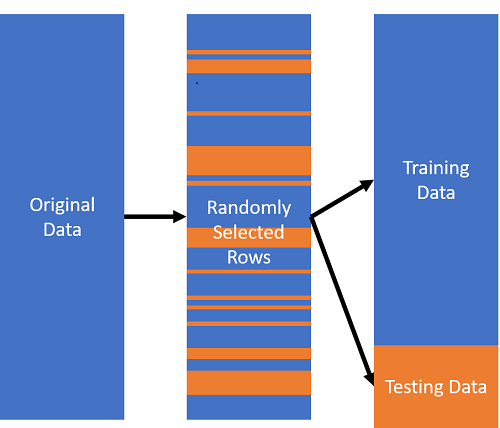


## **Dataset Display**

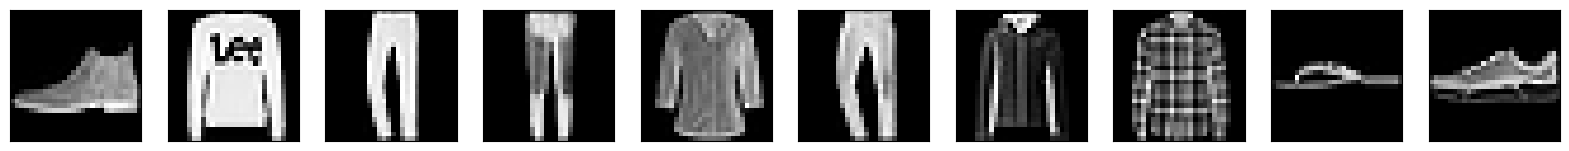

In [3]:
import matplotlib.pyplot as plt

# Number of images to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(X_test[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


**Flattening the Images**

In [6]:
# Print the shapes of the original training data and labels
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))

# Reshape training and testing data to a flat format (flattening the images)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Previous X_train shape: (60000, 784) 
Previous Y_train shape:(60000,)


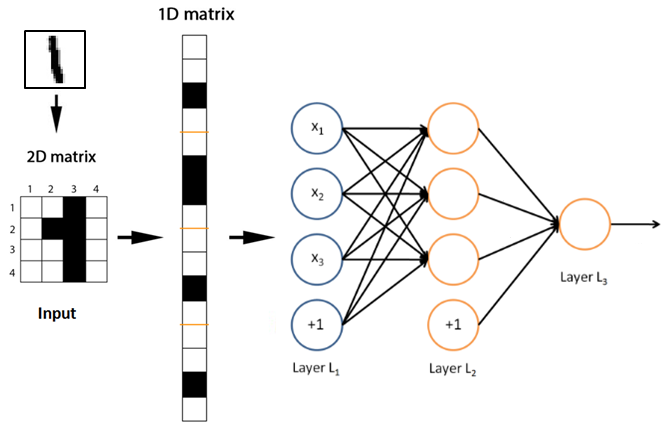



## **Min-Max Scalling**

In [7]:
# Convert the data type of the images to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
X_train /= 255
X_test /= 255

## **Processing the Target variable**

In [8]:
# Number of classes in the dataset
classes = 10
# Convert the labels to one-hot encoded format
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


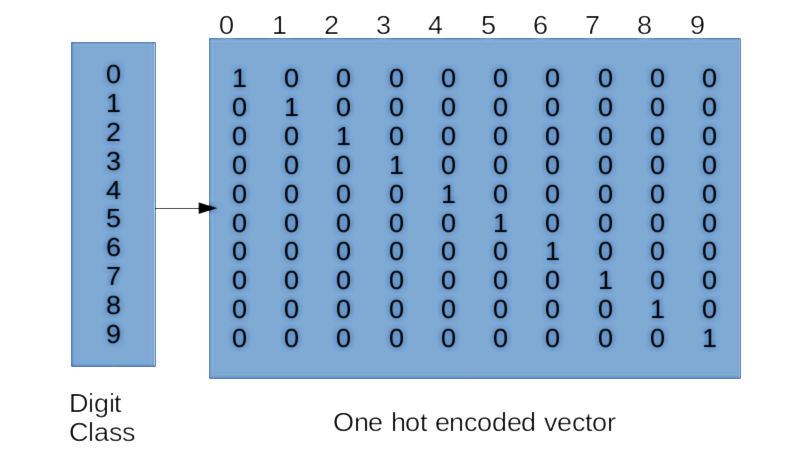

## **Setting up Hyper-parameters**

In [15]:
# Define the input size for each data sample (e.g., image pixels)
input_size = 784

# Specify the number of data samples to process in each batch
batch_size = 100

# Define the number of neurons in the first hidden layer
hidden1 = 200

# Define the number of neurons in the second hidden layer
hidden2 = 50

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 10


## **Building the FCN Model**

In [16]:
### 4. Build the model ###

# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu(dot(W, input) + bias)

# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2, activation='relu'))


# Add the output layer with 'classes' neurons, using softmax activation function
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes, activation='softmax'))

### Compilation ###

# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='sgd')

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()


c:\Users\Azam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

## **Parameters Calculations**
**output = relu(dot(W, input) + bias)**


(400*784) + 400 = 314000 = 0.3 million paramters


**parameters for Chat-gpt 4 = 1760000000000 = 1.76 trillion parameters**

## **Training The Model**

In [17]:
# Import necessary libraries
from time import time

# Record the current time to measure training time
tic = time()

# Fit the model on the training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

# Testing the trained model
### 5. Test
# You can continue your code from here...


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5842 - loss: 1.3587
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7950 - loss: 0.6256
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.5383
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8320 - loss: 0.5003
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8379 - loss: 0.4733
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8442 - loss: 0.4492
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8477 - loss: 0.4342
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8519 - loss: 0.4310
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8519 - loss: 0.4248
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8572 - loss: 0.4129
Model training took 15.214911460876465 secs


## **Testing The Model**

In [18]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest accuracy: {}".format(test_accuracy))



Test accuracy: 0.8095


In [20]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


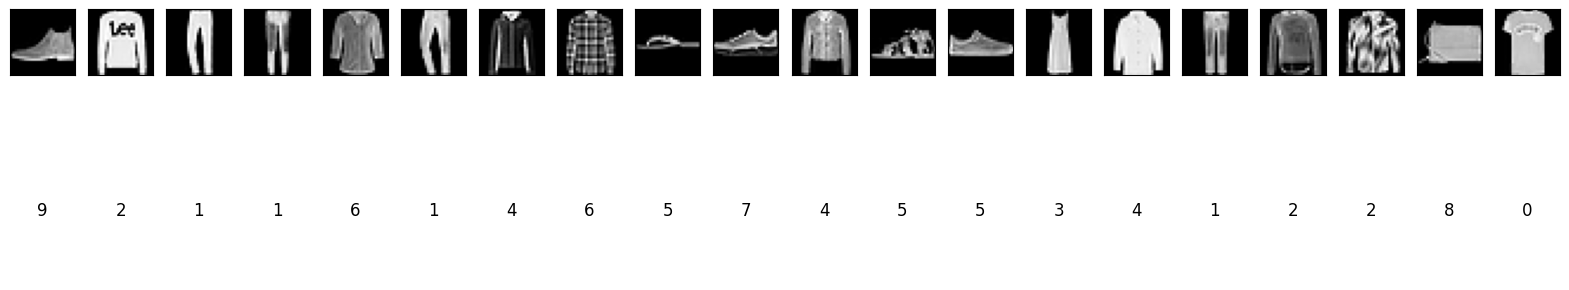

In [21]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()


##Standard (Fully Connected) Neural Network using CIFER10   dataset

## **load the dataset**

In [ ]:

# Load the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


## **function to display the loaded dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Function to display images from the CIFAR-10 dataset
def display_dataset_images(images, labels):
  """
  Displays a grid of sample images from the CIFAR-10 dataset.

  Args:
      images: A NumPy array of images with shape (num_images, height, width, channels).
      labels: A NumPy array of labels with shape (num_images,) where each element is the class index of the corresponding image.
  """

  plt.figure(figsize=(10, 10))  # Create a figure with specified size

  # Loop through 25 images (5 rows x 5 columns)
  for i in range(25):
    # Create a subplot at position (i + 1) in a 5x5 grid
    plt.subplot(5, 5, i + 1)

    # Turn off ticks (x and y axes) for cleaner visualization
    plt.xticks([])
    plt.yticks([])

    # Remove grid lines for better focus on images
    plt.grid(False)

    # Display the image using grayscale colormap
    plt.imshow(images[i], cmap=plt.cm.binary)

    # Extract and display the class label for the image
    plt.xlabel(labels[i][0])

  # Display the entire figure with all subplots
  plt.show()


## **Data Normalization**

In [ ]:

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Class names in the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## **Building the Model**

In [ ]:
# Build the ANN model
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Input layer: flatten the 32x32x3 images
    layers.Dense(512, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),# Hidden layer: 512 neurons with ReLU activation
    layers.Dense(10, activation='softmax')    # Output layer: 10 neurons (one for each class) with softmax activation
])

## **Compile the Model**

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
pip install tensorflow pydot graphviz

In [ ]:
from tensorflow.keras.utils import plot_model

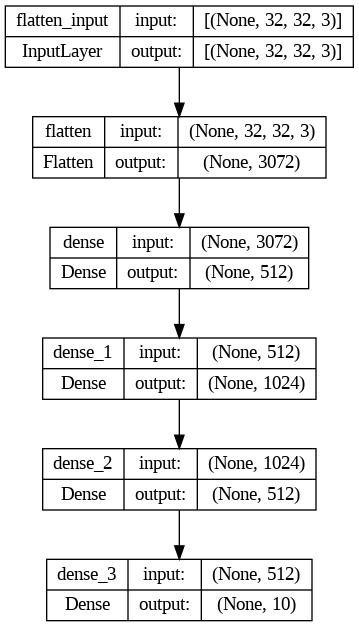

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


## **Training the Neural Network**

In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.8609 - accuracy: 0.3200 - val_loss: 1.7259 - val_accuracy: 0.3770
Epoch 2/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.7032 - accuracy: 0.3830 - val_loss: 1.6425 - val_accuracy: 0.4055
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6360 - accuracy: 0.4099 - val_loss: 1.5939 - val_accuracy: 0.4301
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5767 - accuracy: 0.4309 - val_loss: 1.5487 - val_accuracy: 0.4445
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5312 - accuracy: 0.4482 - val_loss: 1.5431 - val_accuracy: 0.4492


## **Model Evaluation**

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 1s 2ms/step - loss: 1.5304 - accuracy: 0.4556
Test accuracy: 0.45559999346733093


## **Function to display the inferenced images**

In [ ]:
def display_inference_results(images, predictions, actual_labels, class_names, num_samples=5):
  """
  Displays inference results for a sample of images with their actual and predicted labels.

  Args:
      images: A NumPy array of images with shape (num_images, height, width, channels).
      predictions: A NumPy array of predicted class labels with shape (num_images,).
      actual_labels: A NumPy array of actual class labels with shape (num_images,).
      class_names: A list of strings containing the class names for the CIFAR-10 dataset.
      num_samples: The number of images to display (default is 5).
  """

  # Create a figure with a specified size
  plt.figure(figsize=(15, 3))

  # Loop through the specified number of sample images
  for i in range(num_samples):
    # Create a subplot at position (i + 1) in a 1x(num_samples) grid
    plt.subplot(1, num_samples, i + 1)

    # Turn off ticks (x and y axes) for cleaner visualization
    plt.xticks([])
    plt.yticks([])

    # Remove grid lines for better focus on images
    plt.grid(False)

    # Display the image using grayscale colormap
    plt.imshow(images[i], cmap=plt.cm.binary)

    # Extract the predicted class label using argmax
    predicted_label = class_names[predictions[i].argmax()]

    # Extract the actual class label (assuming first element in the array)
    actual_label = class_names[actual_labels[i][0]]

    # Combine and display actual and predicted labels in the subplot
    plt.xlabel(f"Actual: {actual_label}\nPredicted: {predicted_label}")

  # Display the entire figure with all subplots
  plt.show()


## **Inference from The Neural Network**

313/313 [==============================] - 1s 2ms/step


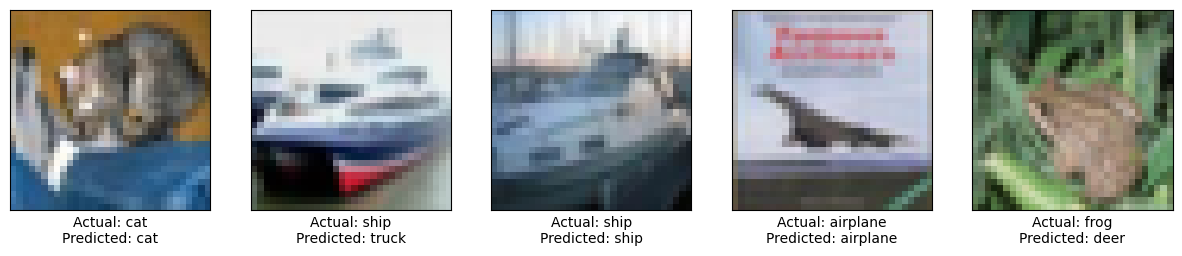

In [ ]:
# Make predictions
predictions = model.predict(test_images)

# Display inference results for sample images with their actual and predicted labels
display_inference_results(test_images, predictions, test_labels, class_names)